In [1]:
import nltk

from nltk.tokenize import sent_tokenize

 

sent_tokenize("My name is tanesh balodi. I am a machine learning engineer.")



['My name is tanesh balodi.', 'I am a machine learning engineer.']

['My name is tanesh balodi.', 'I am a machine learning engineer.']

In [2]:
import pprint

In [3]:
document = "Human machine interface for lab abc computer applications"

In [4]:
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [5]:
# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [6]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [8]:
pprint.pprint(dictionary.token2id)

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}


In [9]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)


[(0, 1), (1, 1)]


In [10]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus)

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]


In [11]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the "system minors" string
words = "system minors".lower().split()
print(tfidf[dictionary.doc2bow(words)])

[(5, 0.5898341626740045), (11, 0.8075244024440723)]


In [12]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)


https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html#sphx-glr-auto-examples-core-run-similarity-queries-py

In [14]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

http://brandonrose.org/clustering#Latent-Dirichlet-Allocation

In [22]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
# import mpld3

In [23]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

NameError: name 'synopses' is not defined

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

NameError: name 'tfidf_matrix' is not defined

In [15]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters


NameError: name 'dist' is not defined

In [12]:
from faker import Faker

def generate() -> 'PoString':
    """ Generate Blurb object.

    Returns:
        Generated object.
    """
    fake = Faker()

    lang = fake.language_code()
    author = fake.language_code()
    author_blurb = fake.last_name()
    strings = fake.paragraphs(nb=3, ext_word_list=None)

    return strings

In [14]:
generate()

['Hotel forward new sit present time. Answer soldier trade sport.',
 'Attack surface marriage hope. Market word billion south system. Eat mind crime bar report born cover.',
 'Town none method artist home treatment. Section boy rock physical maybe heart.']

In [ ]:
Faker.generator_attrs.

https://medium.com/illumination/scraping-news-and-creating-a-word-cloud-in-python-10ea312c49ba

In [15]:
import requests
import urllib.request
import time
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [16]:
topic="bitcoin"
numResults=100
url ="https://www.google.com/search?q="+topic+"&tbm=nws&hl=en&num="+str(numResults)

In [17]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [20]:
results = soup.find_all('div', attrs = {'class': 'ZINbbc'})
descriptions = []
for result in results:
    try:
        description = result.find('div', attrs={'class':'s3v9rd'}).get_text()
        if description != '': 
            descriptions.append(description)
    except:
        continue

In [22]:
text = ''.join(descriptions)

In [23]:
sp = spacy.load('en_core_web_sm')
doc = sp(text)

In [24]:
for word in doc:
    print(word.text, word.pos_, word.dep_)

8 NUM nummod
hours NOUN npadvmod
ago ADV advmod
· PUNCT punct
But CCONJ cc
since SCONJ prep
2018 NUM pobj
the DET det
town NOUN poss
's PART case
Bitcoin PROPN compound
Beach PROPN compound
project NOUN nsubj
has AUX aux
been VERB ROOT
a DET det
petri NOUN compound
dish NOUN attr
for ADP prep
cryptocurrency NOUN compound
adoption NOUN pobj
. PUNCT punct
Backed VERB ROOT
by ADP agent
Californian ADJ amod
donors NOUN pobj
, PUNCT punct
the DET det
project NOUN npadvmod
... PUNCT punct
11 NUM nummod
hours NOUN npadvmod
ago ADV advmod
· PUNCT punct
Reflections NOUN dep
on ADP prep
an DET det
informative ADJ amod
and CCONJ cc
exciting ADJ conj
trip NOUN pobj
to ADP prep
El PROPN compound
Salvador PROPN pobj
, PUNCT punct
the DET det
center NOUN appos
of ADP prep
bitcoin NOUN compound
adoption.4 PROPN pobj
days NOUN npadvmod
ago ADV advmod
· PUNCT punct
The DET det
foray NOUN conj
into ADP prep
bitcoin NOUN compound
risks NOUN pobj
wrecking VERB acl
El PROPN compound
Salvador PROPN poss
's P

Is AUX ROOT
Crypto PROPN nsubj
a DET det
Currency PROPN attr
or CCONJ cc
a DET det
Technology NOUN conj
? PUNCT punct
Most ADJ amod
people NOUN nsubj
from ADP prep
the DET det
traditional ADJ amod
financial ADJ amod
world NOUN compound
approach NOUN pobj
cryptoassets VERB ccomp
like ADP prep
bitcoin NOUN pcomp
in ADP prep
one NUM pobj
of ADP prep
two NUM nummod
ways NOUN pobj
: PUNCT punct
as ADP mark
... SYM pobj
1 NUM nummod
week NOUN npadvmod
ago ADV pcomp
· PUNCT punct
Bitcoin VERB nsubj
topped VERB ROOT
$ SYM nmod
50,000 NUM dobj
for ADP prep
the DET det
first ADJ amod
time NOUN pobj
since SCONJ prep
May PROPN pobj
as ADP mark
crypto ADJ compound
prices NOUN nsubj
continued VERB advcl
an DET det
ongoing ADJ amod
recovery NOUN dobj
from ADP prep
a DET det
disorderly ADJ amod
rout NOUN pobj
just ADV advmod
three NUM nummod
months NOUN appos
... PUNCT punct
1 NUM nummod
day NOUN npadvmod
ago ADV advmod
· PUNCT punct
Cosmos PROPN nsubj
( PUNCT punct
ATOM PROPN appos
) PUNCT punct
rall

- PUNCT punct
way NOUN compound
price NOUN compound
movements NOUN dobj
so ADV advmod
far ADV advmod
... PUNCT punct
3 NUM nummod
hours NOUN npadvmod
ago ADV advmod
· PUNCT punct
Apple PROPN nmod
, PUNCT punct
Astra PROPN compound
Space PROPN npadvmod
, PUNCT punct
Pinduoduo PROPN conj
, PUNCT punct
Bitcoin PROPN conj
, PUNCT punct
Dogecoin PROPN conj
: PUNCT punct
5 NUM nummod
Headlines PROPN appos
From ADP prep
This DET det
Weekend NOUN pobj
You PRON nsubj
May AUX aux
Have AUX aux
Missed VERB ROOT
. PUNCT punct
byMadhukumar PROPN compound
Warrier PROPN ROOT
. PUNCT punct
August PROPN npadvmod
30 NUM nummod
, PUNCT punct
2021 NUM appos
5:02 NUM nummod
... PUNCT punct
3 NUM nummod
weeks NOUN npadvmod
ago ADV advmod
· PUNCT punct
Bitcoin VERB ROOT
to ADP prep
the DET det
moon NOUN pobj
. PUNCT punct
Bitcoin VERB ROOT
to ADP prep
infinity NOUN pobj
. PUNCT punct
The DET det
world NOUN poss
's PART case
largest ADJ amod
cryptocurrency NOUN nsubj
is AUX aux
staging VERB ccomp
a DET det
com

Bitcoin PROPN nsubj
was AUX aux
trading VERB ROOT
around ADP advmod
$ SYM quantmod
48,700 NUM dobj
at ADP prep
press NOUN compound
time NOUN pobj
. PUNCT punct
The DET det
apex NOUN compound
cryptocurrency NOUN nsubj
has AUX aux
ripped VERB ROOT
higher ADJ advmod
over ADP prep
the DET det
past ADJ amod
month NOUN pobj
by ADP prep
23.5 NUM nummod
% NOUN pobj
from ADP prep
the DET det
$ SYM nmod
39,500 NUM nummod
price NOUN compound
level NOUN pobj
on ADP prep
... PUNCT punct
1 NUM nummod
month NOUN npadvmod
ago ADV pcomp
· PUNCT punct
Bitcoin VERB nsubj
now ADV advmod
accounts VERB conj
for ADP prep
9 NUM nummod
% NOUN pobj
of ADP prep
the DET det
value NOUN pobj
of ADP prep
its PRON poss
main ADJ amod
vehicle NOUN pobj
, PUNCT punct
up ADV advmod
from ADP prep
5 NUM nummod
% NOUN pobj
, PUNCT punct
and CCONJ cc
the DET det
dedicated ADJ amod
fund NOUN nsubj
is VERB conj
worth ADJ acomp
around ADP quantmod
$ SYM quantmod
700 NUM nummod
m. NOUN npadvmod
This DET appos
maturing VERB amod


In [25]:
newText = ''
for word in doc:
    if word.pos_ in ['ADJ']:
        newText = " ".join((newText, word.text.lower()))

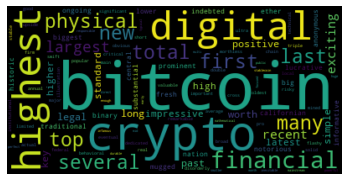

In [27]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(newText)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

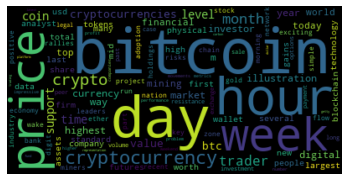

In [28]:
import requests
import urllib.request
import time
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
topic="bitcoin"
numResults=100
url ="https://www.google.com/search?q="+topic+"&tbm=nws&hl=en&num="+str(numResults)
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
results = soup.find_all('div', attrs = {'class': 'ZINbbc'})
descriptions = []
for result in results:
    try:
        description = result.find('div', attrs={'class':'s3v9rd'}).get_text()
        if description != '': 
            descriptions.append(description)
    except:
        continue
text = ''.join(descriptions)

sp = spacy.load('en_core_web_sm')
doc = sp(text)
newText =''
for word in doc:
    if word.pos_ in ['ADJ', 'NOUN']:
        newText = " ".join((newText, word.text.lower()))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(newText)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()